#### Adapted from: https://machinelearningknowledge.ai/keras-lstm-layer-explained-for-beginners-with-example/

# Set the Ticker and Data Point

In [1]:
ticker = "QQQ"
data_point = "Open" 
training_percent = 70
validate_percent = 10
time_frame = 60

# Import the Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from keras.datasets import imdb
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import imdb
from sklearn.metrics import mean_squared_error

from sklearn import externals
#from keras.layers import LSTM, embeddings, dense
#from keras.preprocessing.sequence import pad_sequence

%matplotlib inline

# Load the Training Dataset
### Get the last 'training_start' days of records, and then get the first 'training_end' of those days for training

In [3]:
file = ".\\Data\\" + ticker + ".csv"
df = pd.read_csv(file)
train_count = int(len(df) * (training_percent/100))
print('train_count: ' + str(train_count))

validation_count = int(len(df) * (validate_percent/100))
print('validation_count: ' + str(validation_count))

test_count = int(len(df) * ((100 - training_percent - validate_percent)/100))
print('test_count: ' + str(test_count))

dataset_train = df.head(train_count)
print('dataset_train')
print(df.head(train_count))

dataset_validate = df.head(train_count + validation_count).tail(validation_count)
print('dataset_validate')
print(df.head(train_count + validation_count).tail(validation_count))

dataset_test = df.tail(test_count)
print('dataset_test')
print(df.tail(test_count))


print(len(dataset_train))
print(len(dataset_validate))
print(len(dataset_test))
print(len(df))

train_count: 4169
validation_count: 595
test_count: 1191
dataset_train
            Date        Open        High         Low       Close  Adj Close  \
0     1999-03-10   51.125000   51.156250   50.281250   51.062500  44.011364   
1     1999-03-11   51.437500   51.734375   50.312500   51.312500  44.226841   
2     1999-03-12   51.125000   51.156250   49.656250   50.062500  43.149483   
3     1999-03-15   50.437500   51.562500   49.906250   51.500000  44.388458   
4     1999-03-16   51.718750   52.156250   51.156250   51.937500  44.765549   
...          ...         ...         ...         ...         ...        ...   
4164  2015-09-25  104.910004  105.010002  102.279999  102.919998  97.387321   
4165  2015-09-28  102.480003  102.550003   99.690002   99.989998  94.614807   
4166  2015-09-29  100.239998  101.260002   98.750000   99.470001  94.122772   
4167  2015-09-30  100.889999  101.870003  100.500000  101.760002  96.289658   
4168  2015-10-01  101.940002  102.230003  100.589996  102.22

## Focus on 'Open' Stock Price Column

In [4]:
training_set = dataset_train.loc[:,data_point:data_point].values

print(training_set.shape)

(4169, 1)


# Feature Scaling
To produce the best-optimized results with the models, we are required to scale the data. For this task, we are leveraging scikit-learn library’s minmax scaler for converting the input values between 0 to 1

In [5]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled.shape)

(4169, 1)


# Creating Data with Timesteps
When we are working with LSTM’s, we need to keep the data in a specific format. Once the data is created in the form of 60 timesteps, we can then convert it into a NumPy array. Finally, the data is converted to a 3D dimension array, 'time_frame' number of timeframes, and also one feature at each step

In [6]:
X_train = []
y_train = []
rg = dataset_train.shape[0]
for i in range(time_frame, rg):
    X_train.append(training_set_scaled[i-time_frame:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(X_train.shape)
print(y_train.shape)

(4109, 60, 1)
(4109,)


# Building the LSTM in Keras
First, we add the Keras LSTM layer, and following this, we add dropout layers for prevention against overfitting.

For the LSTM layer, we add 50 units that represent the dimensionality of outer space. The return_sequences parameter is set to true for returning the last output in output.

For adding dropout layers, we specify the percentage of layers that should be dropped. The next step is to add the dense layer. At last, we compile the model with the help of adam optimizer. The error is computed using mean_squared_error.

Finally, the model is fit using 100 epochs with a batch size of 32.

In [7]:
regressor = Sequential()

regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#scores = regressor.evaluate(X_test, y_test, verbose=0)
#print("Accuracy: %.2f%%" % (scores[1]*100))
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
129/129 [==============================] - 14s 38ms/step - loss: 0.0096
Epoch 2/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0030
Epoch 3/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0025
Epoch 4/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0026
Epoch 5/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0021
Epoch 6/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0022
Epoch 7/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0021
Epoch 8/100
129/129 [==============================] - 5s 37ms/step - loss: 0.0017
Epoch 9/100
129/129 [==============================] - 5s 35ms/step - loss: 0.0016
Epoch 10/100
129/129 [==============================] - 5s 37ms/step - loss: 0.0017
Epoch 11/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0016
Epoch 12/100
129/129 [==============================] - 5s 36ms/step - loss: 0.0014


# Predicting Future Stock using the Test Set
For predicting the stock prices, next the training set and test set should be merged. The timestep is set to time_frame, we also apply MinMaxScaler on the new dataset and lastly, the dataset is reshaped.

We are required to use inverse_transform for obtaining the stock prices.

In [8]:
real_stock_price = dataset_test.loc[:,data_point:data_point].values

dataset_total = pd.concat((dataset_train[data_point], dataset_validate[data_point], dataset_test[data_point]), axis = 0)
totLen = len(dataset_total) - len(dataset_test) - time_frame
inputs = dataset_total.iloc[totLen:].values

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

rg = inputs.shape[0]


X_test = []
y_test = []
for i in range(time_frame, rg):
    X_test.append(inputs[i-time_frame:i, 0])
    y_test.append(inputs[i, 0])
    
##X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=5000)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#print(predicted_stock_price.shape)
#print(X_test.shape)

rms = mean_squared_error(y_test, predicted_stock_price , squared=False)
mae = metrics.mean_absolute_error(y_test, predicted_stock_price)
print("Mean Squared Error: ")
print(rms)
print("Mean Absolute Error: ")
print(mae)

38/38 [==============================] - 2s 20ms/step
Mean Squared Error: 
91.23316255154633
Mean Absolute Error: 
90.72447972378058


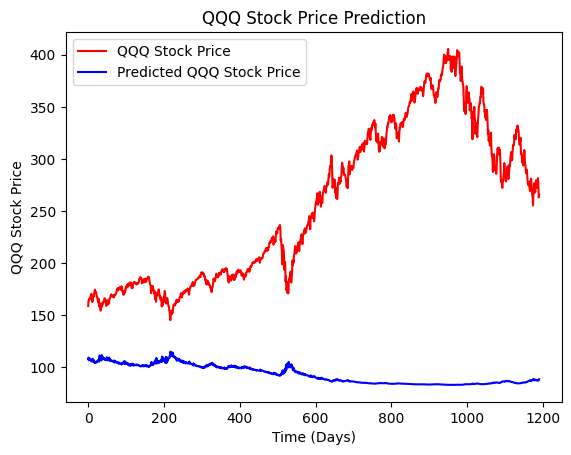

In [9]:
plt.plot(real_stock_price, color = 'red', label = ticker + ' Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted ' + ticker + ' Stock Price')
plt.title(ticker + ' Stock Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(ticker + ' Stock Price')
plt.legend()
plt.show()

In [10]:
real_stock_price = dataset_test.loc[:,data_point:data_point].values
validation_stock_price = dataset_validate.loc[:,data_point:data_point].values
#print(dataset_train.tail())
#print(dataset_validate.head())
# bring together the training data, the validation data, and the test data
#ds = pd.concat((dataset_train, dataset_validate, dataset_test), axis = 0)

# get the data_point (e.g. Open) from the data
#dataset_total = ds.loc[:,data_point:data_point]
#print(len(dataset_total))

# get the values from row number 'TOTAL Length' to the end
inputs = dataset_train.loc[:,data_point:data_point].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

rg = inputs.shape[0]
#print('rg: ' + str(rg))

X_test = []
y_test = []
for i in range(time_frame, rg):
    X_test.append(inputs[i-time_frame:i, 0])
    #if (i == rg -2):
    #    x = sc.inverse_transform(inputs)
    #    print(x)
        
for i in range(0, len(dataset_validate)):
    y_test.append(validation_stock_price[i, 0])
    

##X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=5000)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_test = np.reshape(y_test, (y_test.shape[0], 1))

#y_test = sc.transform(y_test)
#????how do i fit validation data in here

#print(sc.inverse_transform(X_test[1500]))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#print("Predicted: ")
#print(dataset_train.tail(1))
#print(str(predicted_stock_price[1]))
#print("Validation: ")
#print(str(y_test[0]))

#print(predicted_stock_price.shape)
#print(y_test.shape)

validate = np.array(predicted_stock_price)
validate = np.resize(validate, y_test.shape[0])
#print(validate.shape)

rms = mean_squared_error(y_test, validate , squared=False)
mae = metrics.mean_absolute_error(y_test, validate)
print("Mean Squared Error: ")
print(rms)
print("Mean Absolute Error: ")
print(mae)

129/129 [==============================] - 3s 20ms/step
Mean Squared Error: 
68.55071001652983
Mean Absolute Error: 
58.345473357851894


# Plotting the Results

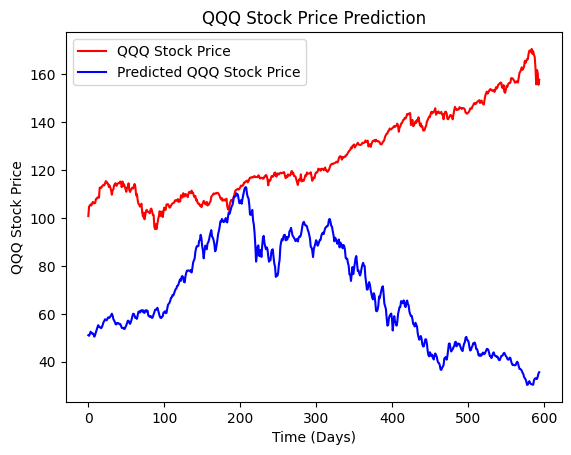

In [11]:
plt.plot(y_test, color = 'red', label = ticker + ' Stock Price')
plt.plot(validate, color = 'blue', label = 'Predicted ' + ticker + ' Stock Price')
plt.title(ticker + ' Stock Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(ticker + ' Stock Price')
plt.legend()
plt.show()

In [12]:
import joblib
joblib.dump(regressor,"stock_prediction.pkl")

INFO:tensorflow:Assets written to: ram://9363cf92-e649-4ca1-9239-9edd147fcd7b/assets


INFO:tensorflow:Assets written to: ram://9363cf92-e649-4ca1-9239-9edd147fcd7b/assets


['stock_prediction.pkl']

In [ ]:
## save model
save_path = './model.h5'
regressor.save(save_path)

In [ ]:
import requests
data = {"area": 6.50}
response = requests.post("{}/".format("http://127.0.0.1:5000"), json =data )
print("Price should be "+ str(response.json()))